In [1]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import pandas as pd
import numpy as np
import seaborn
from bokeh.io import show, output_notebook, output_file
from bokeh.plotting import figure
from bokeh.models import ColumnDataSource

In [2]:
output_notebook()

Loading BokehJS ...

In [3]:
# Get data from file
df = pd.read_csv('data_with_titles.csv', delimiter=';')

# add column titles
df.columns = ['RePEc Handle', 'Year', 'Citations', 'IF', 'IF 5 Years', 'Documents_Published', 'H-Index', 'Type', 
              'ISSN 1', 'ISSN 2', 'Type 2', 'Year 3', 'Scimago Source ID', 'SJR', 'Type 4', 'Year 5', 'Jourqual', 
              'Type 6', 'Year 7', 'BWL', 'Type 8', 'Year 9', 'VWL', 'Title']

# replace Null values with 0
df = df.fillna(0)

# filter rows with no title
df = df[df.Title != '???']
# and rows with the same title
df.drop_duplicates(subset='Title', keep=False, inplace=True)

df

,RePEc Handle,Year,Citations,IF,IF 5 Years,Documents_Published,H-Index,Type,ISSN 1,ISSN 2,...,Type 4,Year 5,Jourqual,Type 6,Year 7,BWL,Type 8,Year 9,VWL,Title
0,RePEc:aem:journl,2017,0.0,0.00,0.00,19,1.0,ReDIF-Article,2537-6179,1857-436X,...,vhb-jourqual,2015,0,Handelsblatt-Ranking BWL,2018,0,Handelsblatt-Ranking VWL,2017,0,Eastern European Journal for Regional Studies ...
1,RePEc:aem:wpaper,2017,0.0,0.00,0.00,17,0.0,ReDIF-Article,2537-6187,0,...,vhb-jourqual,2015,0,Handelsblatt-Ranking BWL,2018,0,Handelsblatt-Ranking VWL,2017,0,CSIE Working Papers
2,RePEc:aen:eeepjl,2017,117.0,1.08,1.09,15,13.0,ReDIF-Article,0195-6574,1944-9089,...,vhb-jourqual,2015,0,Handelsblatt-Ranking BWL,2018,D,Handelsblatt-Ranking VWL,2017,C,Economics of Energy & Environmental Policy
3,RePEc:aen:journl,2017,486.0,1.35,1.67,67,64.0,ReDIF-Article,0195-6574,1944-9089,...,vhb-jourqual,2015,0,Handelsblatt-Ranking BWL,2018,D,Handelsblatt-Ranking VWL,2017,C,The Energy Journal
6,RePEc:aes:amfeco,2017,64.0,0.14,0.17,62,11.0,ReDIF-Article,1582-9146,2247-9104,...,vhb-jourqual,2015,0,Handelsblatt-Ranking BWL,2018,E,Handelsblatt-Ranking VWL,2017,E,The AMFITEATRU ECONOMIC journal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1170,RePEc:zbw:rwikon,2017,12.0,0.28,0.20,14,8.0,ReDIF-Article,1861-6305,0,...,vhb-jourqual,2015,0,Handelsblatt-Ranking BWL,2018,0,Handelsblatt-Ranking VWL,2017,0,RWI Konjunkturberichte
1171,RePEc:zbw:uoclwp,2017,0.0,0.00,0.00,0,1.0,ReDIF-Article,1611-4558,0,...,vhb-jourqual,2015,0,Handelsblatt-Ranking BWL,2018,0,Handelsblatt-Ranking VWL,2017,0,Leasing - Wissenschaft & Praxis
1172,RePEc:zbw:wirtdi,2017,0.0,0.00,0.00,0,10.0,ReDIF-Article,0043-6275,1613-978X,...,vhb-jourqual,2015,0,Handelsblatt-Ranking BWL,2018,0,Handelsblatt-Ranking VWL,2017,E,Wirtschaftsdienst – Zeitschrift für Wirtschaft...
1173,RePEc:zna:indecs,2017,15.0,0.11,0.08,34,4.0,ReDIF-Article,1334-4676,1334-4684,...,vhb-jourqual,2015,0,Handelsblatt-Ranking BWL,2018,0,Handelsblatt-Ranking VWL,2017,F,Interdisciplinary Description of Complex Syste...


In [8]:
# get a subset of journals with number of publications > 400
subset = df[df['Documents_Published'] > 400]

p = figure(x_range=subset.Title, plot_height=500, plot_width=900, title='2017 Citations by Journal (with > 400 Publications)')
p.vbar(x=subset.Title, top=subset.Citations, width=0.9)
p.xgrid.grid_line_color = None
p.y_range.start = 0
p.xaxis.major_label_orientation = 1

show(p)

What is useful to visualize with the available information? There's almost 2,000 journals, doing anything with all of them seems counter productive.

Possibilites?
- [X] Number of citations vs. Number of Publications?
- [ ] H-Index vs. Publications
- [ ] Publications vs. Impact Factor
- [ ] Finding outliers? Are there journals with lots of citations but not so many publications? Are there journals that will publish anything but no one seems to cite?
- [ ] The data for the HBI BWL and VWL classes are for individual authors, how does that translate to journals as a whole? Is it the average, median, something else?
- [ ] how does "Jourqual Category" measure up to IF, H-Index, Citations?
- [ ] what about SJR score?
- [ ] How many journals receive various ratings?

In [5]:
from bokeh.transform import transform
from bokeh.models import LinearColorMapper, ColorBar, HoverTool

source = ColumnDataSource(df)

hover = HoverTool(
        tooltips=[
            ("Title", "@Title"),
            ("Publications", "@Documents_Published"),
            ("Citations", "@Citations"),
            ("IF", "@IF")
        ]
    )

color_mapper = LinearColorMapper(palette="Viridis256", low=df['IF'].min(), high=df['IF'].max())

p = figure(plot_width=900, plot_height=1000, title="Citations and Publications per Journal", tools=[hover])
p.circle('Documents_Published', 'Citations', size=15, color=transform('IF', color_mapper), fill_alpha=0.5, source=source)

color_bar = ColorBar(color_mapper=color_mapper, label_standoff=12, location=(0, 0), title='Impact Factor')

p.xaxis.axis_label = 'Documents Published'
p.yaxis.axis_label = 'Citations'
p.add_layout(color_bar, 'right')

#output_file('out.html')

show(p)

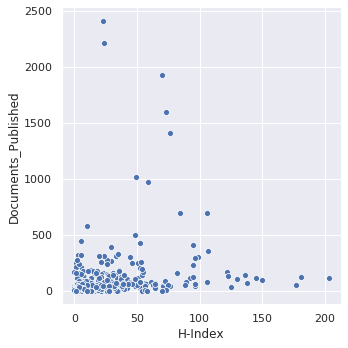

In [6]:
import seaborn as sns
sns.set()

sns.relplot(x='H-Index', y='Documents_Published', data=df)

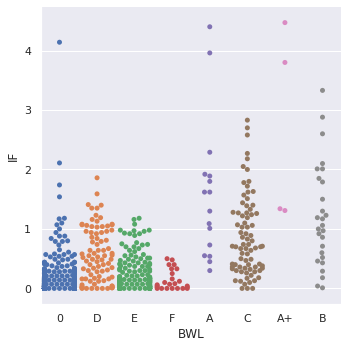

In [7]:
sns.catplot(x='BWL', y='IF', kind="swarm", data=df)

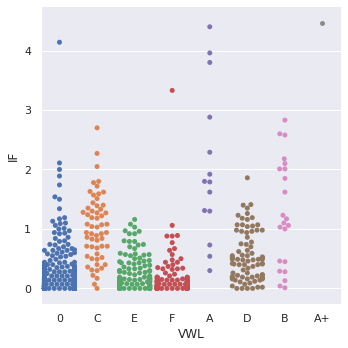

In [16]:
sns.catplot(x='VWL', y='IF', kind="swarm", data=df)

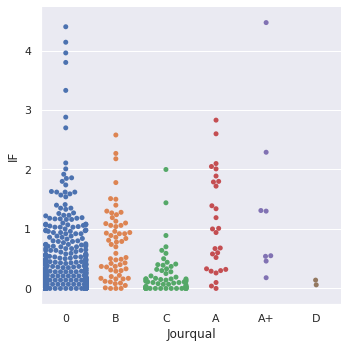

In [15]:
sns.catplot(x='Jourqual', y='IF', kind="swarm", data=df)

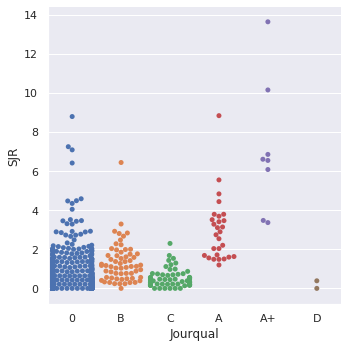

In [18]:
sns.catplot(x='Jourqual', y='SJR', kind="swarm", data=df)

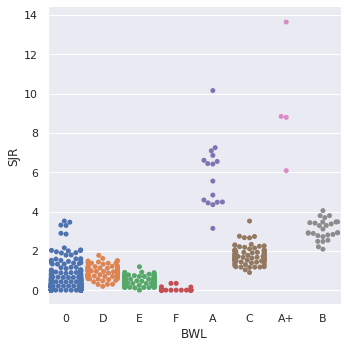

In [19]:
sns.catplot(x='BWL', y='SJR', kind="swarm", data=df)

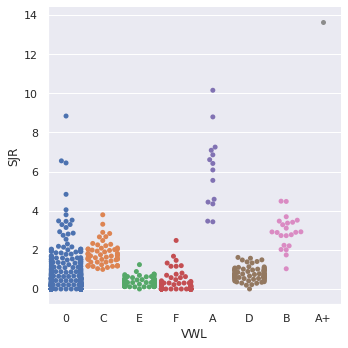

In [20]:
sns.catplot(x='VWL', y='SJR', kind="swarm", data=df)

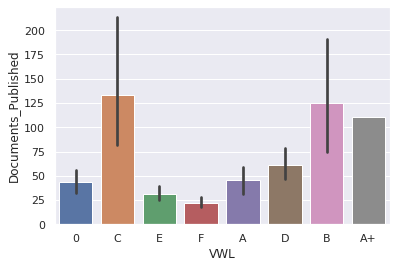

In [22]:
sns.barplot(x='VWL', y='Documents_Published', data=df)

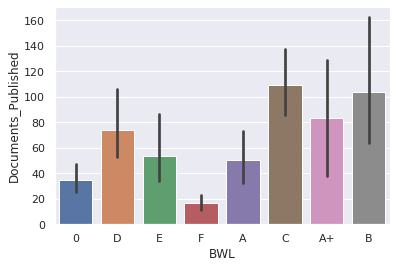

In [23]:
sns.barplot(x='BWL', y='Documents_Published', data=df)

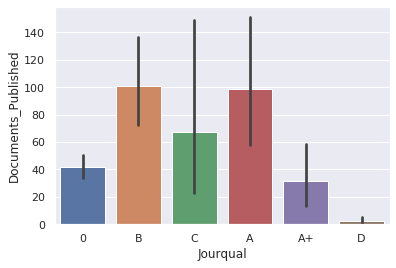

In [24]:
sns.barplot(x='Jourqual', y='Documents_Published', data=df)